In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Encoder
import mdct
import librosa
import os
from IPython.display import Audio
import soundfile as sf
# from scipy.interpolate import make_interp_spline
# from scipy.ndimage.filters import gaussian_filter

In [2]:
def draw_mdct_spectogram(data, rate, start_time, duration, title):
    data = data[:,int(start_time*rate/512):int((start_time+duration)*rate/512)]
    data = np.float64(data)
    eps = 1e-10
    data = np.log(eps + data ** 2)
    data = np.flipud(data)
#     plt.title(title)
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Frequency Bins')
    plt.rc('font', size=12)
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = ["Times New Roman"]
    plt.imshow(data, aspect='auto', extent=[start_time,start_time+duration,0,512])
    
def play(data, rate, start_time, duration):
    display(Audio(wave_data[int(start_time*rate):int((start_time+duration)*rate)], rate=sr))
    
def draw_relative_indices(data, rate, start_time, duration, title, ylabel, ymax):
    data = data[int(start_time*rate/512):int((start_time+duration)*rate/512)]
    x = np.arange(start_time, start_time+duration, 512/sr)        
    l = min(len(x), len(data))
#     plt.title(title)
    ax2 = plt.twinx()
    ax2.set_ylabel(ylabel, color='r', labelpad=10)
    ax2.set_ylim(0, ymax)
    ax2.tick_params(axis ='y', colors = 'r')
    plt.plot(x[:l], data[:l], color='r', linewidth=3)
    
#     kernel_size = 10
#     kernel = np.ones(kernel_size) / kernel_size
#     data_convolved = np.convolve(data[:l], kernel, mode='same')
#     plt.plot(x[:l], data_convolved, color='r')
    
#     X_Y_Spline = make_interp_spline(x[:l], data[:l], k=3)
#     X_ = np.linspace(3*512/sr, duration - 3*512/sr, 10*sr//512)
#     Y_ = X_Y_Spline(X_)
#     plt.plot(X_, Y_)

#     blurred = gaussian_filter(data, sigma=2)
#     plt.plot(x[:l], blurred[:l], color='r')

In [3]:
wave_data, sr = librosa.load('samples/billie_jean.wav')

In [4]:
wave_data_mdct = mdct.mdct(wave_data)

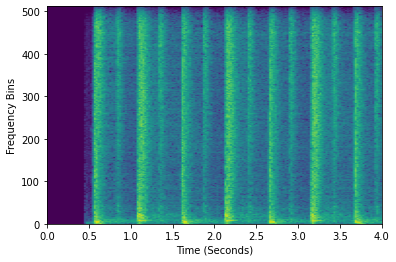

In [5]:
# wave_data_mdct = wave_data_mdct/np.max(wave_data_mdct)
draw_mdct_spectogram(wave_data_mdct, sr, 0, 4, 'Billie Jean - Raw Spectogram')
plt.savefig('billie_jean_4sec.svg')
play(wave_data, sr, 0, 4)

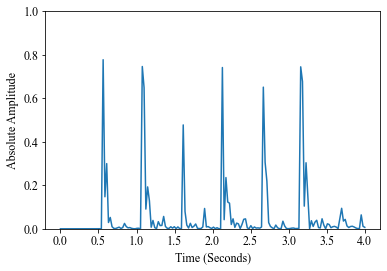

In [6]:
# plt.title('Frequency Bin of 100')
plt.xlabel('Time (Seconds)')
plt.ylabel('Absolute Amplitude')
plt.rc('font', size=12)
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.ylim(0, 1)
data = wave_data_mdct[25][:int(4*sr)//512]
eps = 1e-10
data = abs(data)
plt.plot(np.linspace(0,4, int(4*sr)//512), data)
plt.savefig('billie_jean_4sec_25freq.svg')

44
4.775869265264199


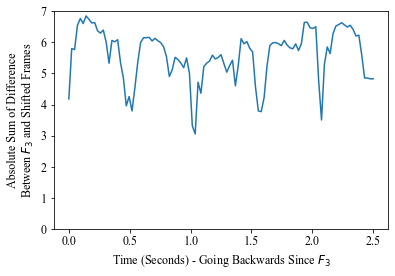

In [7]:
w_start = int(2.5*sr)//512
w_end = int(3.5*sr)//512
data = wave_data_mdct[25][w_start:w_end]

error = []
p = 1
while w_start - p >= 0:
    data2 = wave_data_mdct[25][w_start-p:w_end-p]
    error.append(np.sum(abs(data - data2)))
    p = p + 1
    
print(np.argmin(error))
print(error[87])
    
plt.xlabel(r'Time (Seconds) - Going Backwards Since $F_3$')
plt.ylabel("Absolute Sum of Difference\n" + r"Between $F_3$ and Shifted Frames")
plt.rc('font', size=12)
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.ylim(0, 7)
plt.plot(np.linspace(0,2.5, w_start), error)
plt.savefig('shift.svg')
plt.show()

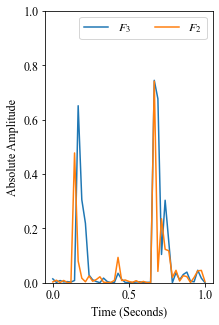

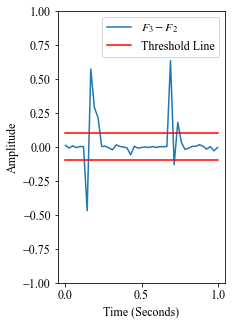

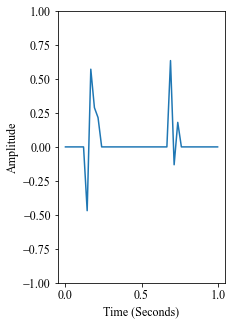

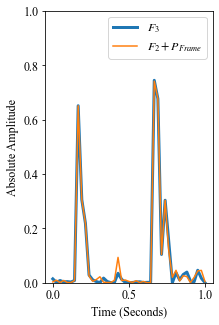

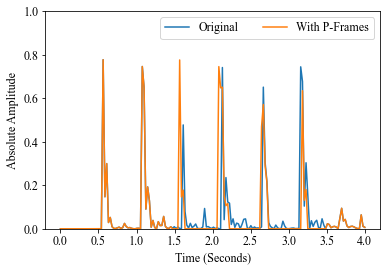

In [8]:
F1_start = int(0.5*sr)//512
F2_start = int(1.5*sr)//512
F3_start = int(2.5*sr)//512
F4_start = int(3.5*sr)//512
data = wave_data_mdct[25][0:int(4*sr)//512]
data = abs(data)
F1 = data[F1_start-1: F2_start-1]
F2 = data[F2_start-1: F3_start-1]
F3 = data[F3_start: F4_start]

# p = 44+1
    
plt.figure(figsize=(3, 5))
plt.xlabel('Time (Seconds)')
plt.ylabel('Absolute Amplitude')
plt.ylim(0, 1)
plt.plot(np.linspace(0,1, int(1*sr)//512), F3)
plt.plot(np.linspace(0,1, int(1*sr)//512), F2)
plt.legend([r'$F_3$', r'$F_2$'], ncol=2)
plt.savefig('f3,f2.svg')
plt.show()

plt.figure(figsize=(3, 5))
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.ylim(-1, 1)
pframe2 = F2-F1
pframe3 = F3-F2
plt.plot(np.linspace(0,1, int(1*sr)//512), pframe3)
plt.plot(np.linspace(0,1, int(1*sr)//512), np.ones(int(1*sr)//512)/10, c='r')
plt.plot(np.linspace(0,1, int(1*sr)//512), -np.ones(int(1*sr)//512)/10, c='r')
plt.legend([r'$F_3-F_2$', 'Threshold Line'], ncol=1)
plt.savefig('f3-f2.svg')
plt.show()


pframe2 = np.where(abs(pframe2) < 0.1, 0, pframe2)
pframe3 = np.where(abs(pframe3) < 0.1, 0, pframe3)
plt.figure(figsize=(3, 5))
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.ylim(-1, 1)
plt.plot(np.linspace(0,1, int(1*sr)//512), pframe3)
plt.savefig('pframe3.svg')
plt.show()

plt.figure(figsize=(3, 5))
plt.xlabel('Time (Seconds)')
plt.ylabel('Absolute Amplitude')
plt.ylim(0, 1)
plt.plot(np.linspace(0,1, int(1*sr)//512), F3, lw=3)
plt.plot(np.linspace(0,1, int(1*sr)//512), F2+pframe3)
plt.legend([r'$F_3$', r'$F_2+P_{Frame}$'], ncol=1)
plt.savefig('f3f2+p.svg')
plt.show()


# plt.figure(figsize=(5, 5))
plt.xlabel('Time (Seconds)')
plt.ylabel('Absolute Amplitude')
plt.ylim(0, 1)
plt.plot(np.linspace(0,4, int(4*sr)//512), data)
data[F2_start-1: F3_start-1] = abs(pframe2)
data[F3_start: F4_start] = abs(pframe3)
plt.plot(np.linspace(0,4, int(4*sr)//512), data)
plt.legend(['Original', r'With P-Frames'], ncol=2)
plt.savefig('ipp.svg')
plt.show()

In [113]:
encoded_mdct_data = Encoder.encode_mdct(wave_data, sr, 'samples/billie_jean.npz', zero_threshold=0)

MDCT:   0%|          | 0/12667 [00:00<?, ?it/s]

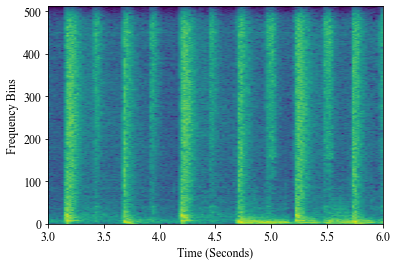

In [114]:
encoded_mdct_data_t = np.transpose(encoded_mdct_data)
draw_mdct_spectogram(encoded_mdct_data_t, sr, 3, 3, 'Billie Jean - MDCT Compressed Spectogram')
play(wave_data, sr, 3, 3)

In [115]:
encoded_mdct_diff_data, relative_indices, improves = Encoder.encode_mdct_diff(wave_data, sr, 'samples/billie_jean_diff.npz',
                                                                                    zero_threshold_i_frame=0,
                                                                                    zero_threshold_p_frame=10**-3)

MDCT DIFF:   0%|          | 0/12667 [00:00<?, ?it/s]

In [116]:
np.count_nonzero(relative_indices)/len(relative_indices)

0.9859477382174153

0.014052261782584669
0.13227640323484666
0.05084474337416927
0.008327328048682841


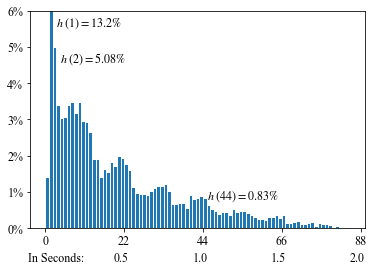

In [117]:
from matplotlib.ticker import PercentFormatter, FuncFormatter

print(len(relative_indices[relative_indices == 0])/len(relative_indices))
print(len(relative_indices[relative_indices == 1])/len(relative_indices[relative_indices != 0]))
print(len(relative_indices[relative_indices == 2])/len(relative_indices[relative_indices != 0]))
print(len(relative_indices[relative_indices == 44])/len(relative_indices[relative_indices != 0]))

def formatTime(x, pos):
    return x/44

fig, ax = plt.subplots(ncols=1)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0, is_latex=True))
ax.hist(relative_indices, bins=85, density=True, edgecolor="white")
plt.xticks(np.arange(0, 89, 22))
plt.ylim(0,0.06)
plt.text(3, .056, r'$h\ (1) = 13.2\%$')
plt.text(4, .046, r'$h\ (2) = 5.08\%$')
plt.text(45, .008, r'$h\ (44) = 0.83\%$')
plt.text(-5, -0.009, 'In Seconds:')
plt.text(44-3, -0.009, '1.0')
plt.text(22-3, -0.009, '0.5')
plt.text(66-3, -0.009, '1.5')
plt.text(88-3, -0.009, '2.0')
plt.savefig('hist.svg')
plt.show()

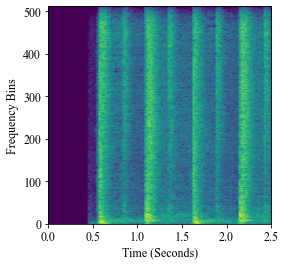

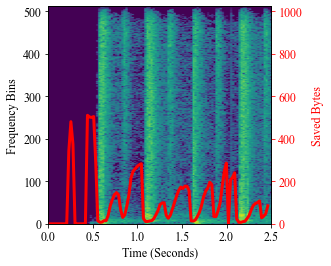

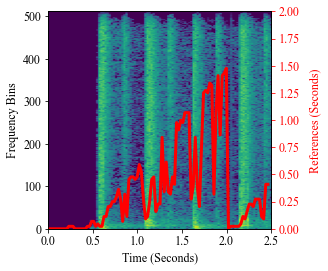

In [118]:
play(wave_data, sr, 0, 2.5)

plt.figure(figsize=(4,4))
draw_mdct_spectogram(wave_data_mdct, sr, 0, 2.5, 'Billie Jean - Raw Spectogram')
plt.savefig('billie_jean_2.5sec.svg')
plt.show()

encoded_mdct_diff_data_t = encoded_mdct_diff_data.transpose()
plt.figure(figsize=(4,4))
draw_mdct_spectogram(encoded_mdct_diff_data_t, sr, 0, 2.5, 'MDCT Spectogram with Saved Bytes')
draw_relative_indices(improves, sr, 0, 2.5, 'MDCT Spectogram with Saved Bytes', 'Saved Bytes', 512*2)
plt.savefig('saved_2.5sec.svg')
plt.show()

plt.figure(figsize=(4,4))
draw_mdct_spectogram(encoded_mdct_diff_data_t, sr, 0, 2.5, 'MDCT Spectogram with Saved Bytes')
draw_relative_indices(relative_indices/44, sr, 0 , 2.5, 'Referenced Relative Frames', 'References (Seconds)', 2)
plt.savefig('ref_2.5sec.svg')
plt.show()

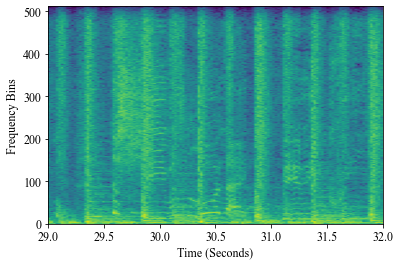

In [119]:
draw_mdct_spectogram(wave_data_mdct, sr, 29, 3, 'Billie Jean - Raw Spectogram - at 00:29')
play(wave_data, sr, 29, 3)

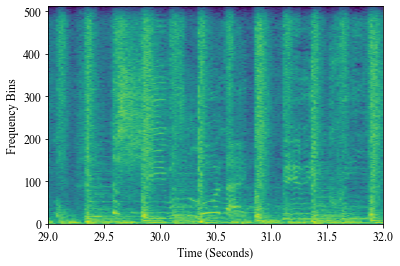

In [120]:
encoded_mdct_data_t = np.transpose(encoded_mdct_data)
draw_mdct_spectogram(encoded_mdct_data_t, sr, 29, 3, 'Billie Jean - MDCT Compressed Spectogram - at 00:29')

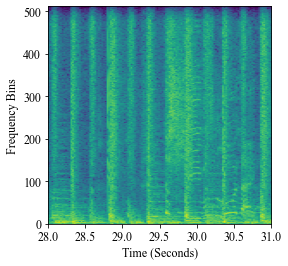

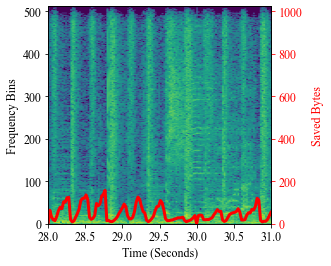

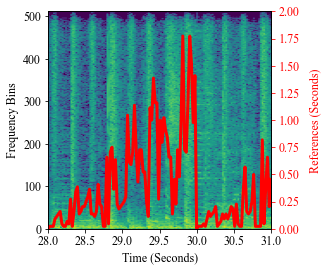

In [121]:
play(wave_data, sr, 28, 3)

plt.figure(figsize=(4,4))
draw_mdct_spectogram(wave_data_mdct, sr, 28, 3, 'Billie Jean - MDCT Compressed Diff Spectogram')
plt.savefig('billie_jean_3sec.svg')
plt.show()

plt.figure(figsize=(4,4))
draw_mdct_spectogram(encoded_mdct_diff_data_t, sr, 28, 3, 'MDCT Spectogram with Saved Bytes')
draw_relative_indices(improves, sr, 28, 3, 'MDCT Spectogram with Saved Bytes', 'Saved Bytes', 512*2)
plt.savefig('saved_3sec.svg')
plt.show()

plt.figure(figsize=(4,4))
draw_mdct_spectogram(encoded_mdct_diff_data_t, sr, 28, 3, 'MDCT Spectogram with Saved Bytes')
draw_relative_indices(relative_indices/44, sr, 28 , 3, 'Referenced Relative Frames', 'References (Seconds)', 2)
plt.savefig('ref_3sec.svg')
plt.show()

In [122]:
loaded = np.load('samples/billie_jean_diff.npz', allow_pickle=True)
decoded_data = Encoder.decode_mdct_diff(loaded)
sf.write('samples/billie_jean_decoded.wav', decoded_data, loaded['sample_rate'])

MDCT DIFF Decode:   0%|          | 0/12666 [00:00<?, ?it/s]

In [16]:
play(decoded_data, loaded['sample_rate'], 29, 100)

In [18]:
sf.write('samples/billie_jean_raw.wav', wave_data, loaded['sample_rate'])

5.819330315015521e-22


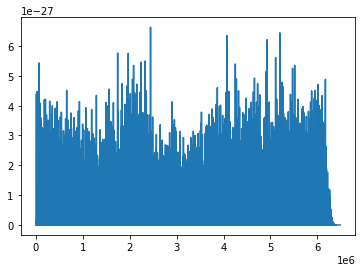

In [33]:
decoded_data2 = mdct.imdct(mdct.mdct(wave_data))

l = min(len(wave_data), len(decoded_data2))
diff = wave_data[:l]-decoded_data2[:l]
print(np.sum(diff**2))
plt.plot(diff**2)